In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
# from sklearn.linear_model import LogisticRegression

In [7]:
df=pd.read_csv("../data/raw/titanic.csv")
dicionario = pd.read_csv("../data/external/novo_dictionario.csv")
dicionario

,Unnamed: 0,variavel,descrição,tipo,subtipo
0,0,survived,Sobreviventes da tragédia,quantitativo,discreto
1,1,pclass,Status socioeconomico,qualitativo,ordinal
2,2,sex,Gênero das pessoas,qualitativo,Nominal
3,3,age,Idade das pessoas,quantitativa,continua
4,4,sibsp,Relação familiar de irmãos e cônjuge,qualitativas,nominal
5,5,parch,Relação familiar de pais e filhos,qualitativas,nominal
6,6,fare,Tarifa do passageiro,quantitativo,continua
7,7,embarked,Porto de embarcação,quantitativa,continua
8,8,class,Número da classe social,quantitativa,discreto
9,9,who,"Homem, Mulher ou Criança",qualitativa,nominal


In [8]:
contg_coluna = df.isnull().sum()
print(f"Valores faltantes nas colunas: {contg_coluna}\n")

qntd_duplicados = df.duplicated().sum()
print(f"\nQuantidade de linhas duplicadas são:{qntd_duplicados}")

Valores faltantes nas colunas: Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Quantidade de linhas duplicadas são:0


In [9]:
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


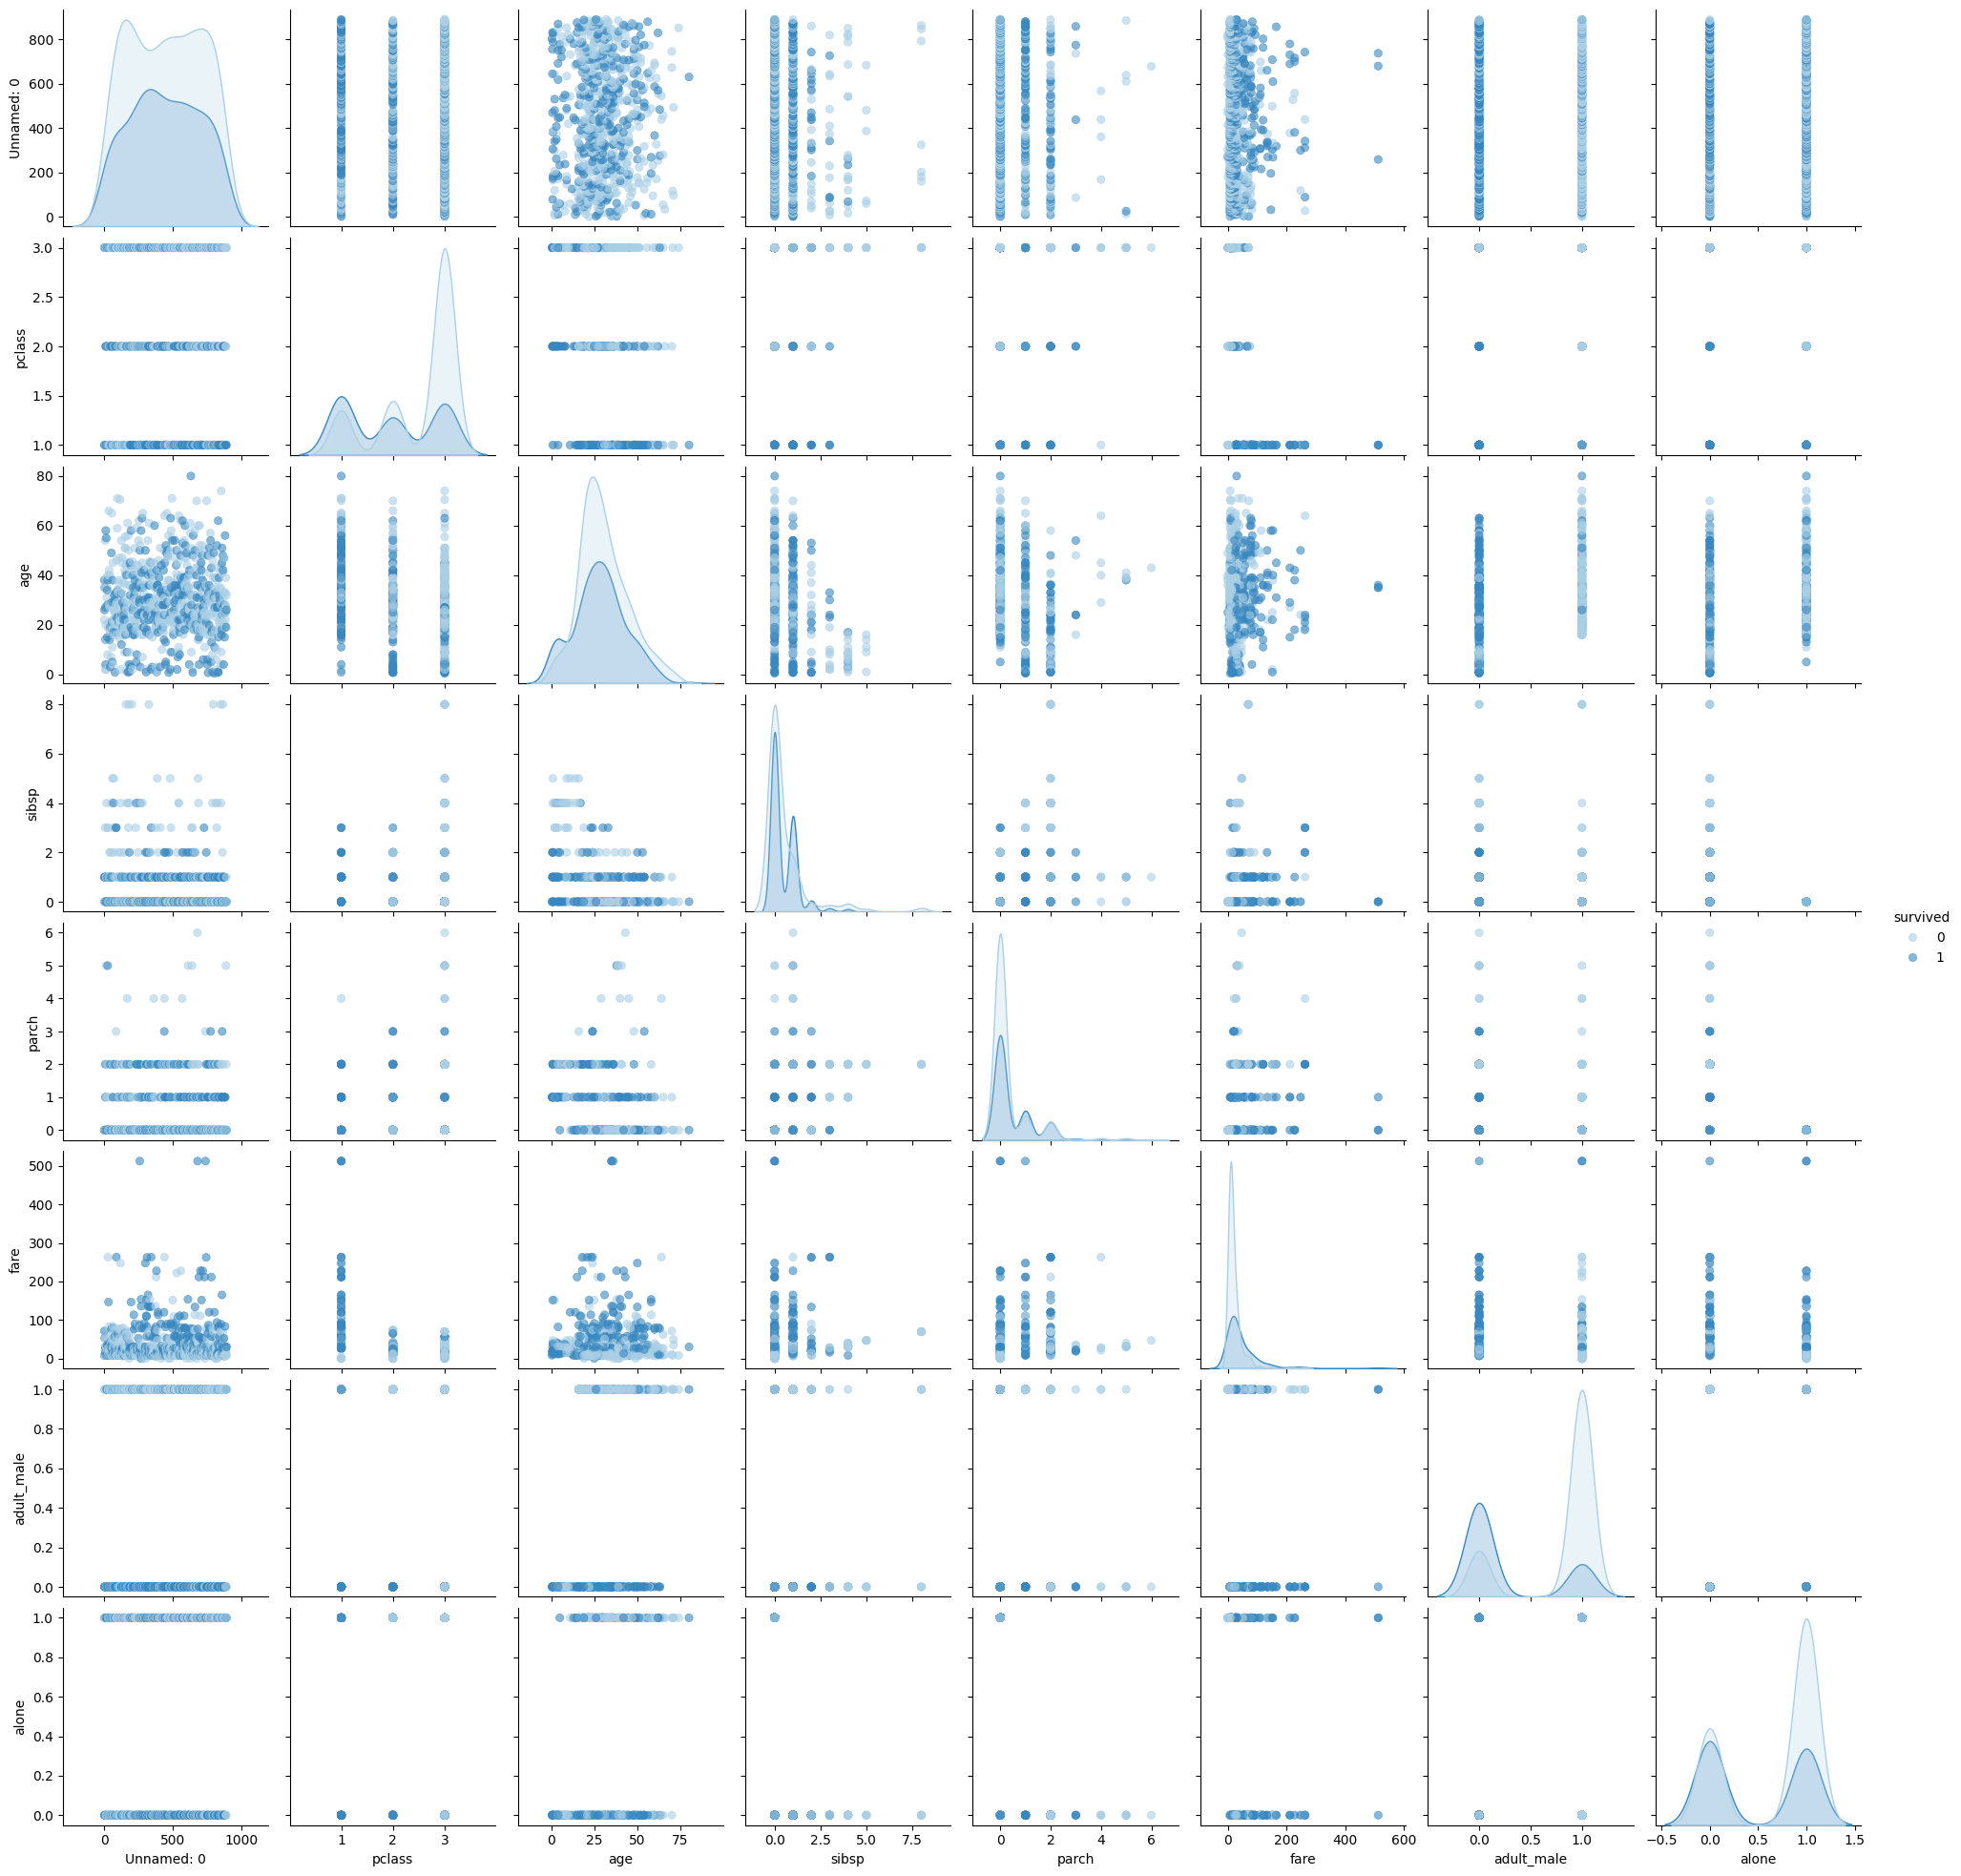

In [17]:
#palette = sns.light_palette("blue", reverse=True, as_cmap=False)
sns.pairplot(df, diag_kind='kde',
             hue='survived', palette='Blues',
             plot_kws=dict(edgecolor=None, alpha=0.6))
plt.show()


#### Identificando Outiliers

Com o gráfico de pairplot fica mais simples de se observar anomalias